In [19]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/home/administrator/Python/Datasets/Social_Network_Ads.csv')
data.shape
data.info()
data.tail(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


<AxesSubplot:>

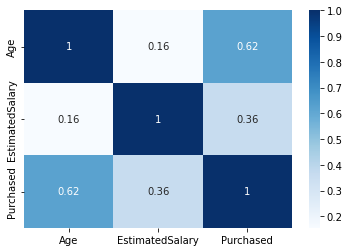

In [3]:
sns.heatmap(data.corr(), cmap='Blues', annot=True)

In [23]:
X = data[['Age','EstimatedSalary']]
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [24]:
y = data['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.95,random_state=21)
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Mean Square Error = '+ str(mean_squared_error(y_pred,y_test)))
print('Accuracy of the model = '+str(r2_score(y_pred,y_test)))

Mean Square Error = 0.05
Accuracy of the model = 0.7333333333333334


plt.scatter(X, y, color = 'blue')
plt.plot(X, y_pred, color = 'red')
plt.title('Logestic Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

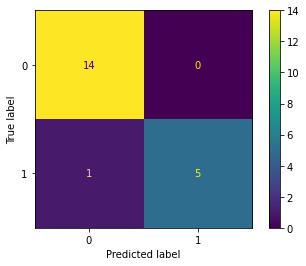

In [25]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()